
### 기계학습특강 기말고사

In [ ]:
import torch 
from fastai.text.all import *

In [ ]:
df = pd.read_csv('/content/Corona_NLP_train.csv',encoding="ISO-8859-1")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral


In [ ]:
# 텍스트 분석
# 1단계 : TextDataLoaders
# 2단계 : language_model_learner()
# 3단계 : lrnr.fit()
# 4단계 : lrnr.predict()

df = pd.read_csv('Corona_NLP_train.csv',encoding="ISO-8859-1")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral


In [ ]:
TextDataLoaders?

In [ ]:
dls = TextDataLoaders.from_df(df,text_col='OriginalTweet',is_lm=True, seq_len=64)

In [ ]:
dls.show_batch()

,text,text_
0,xxbos xxmaj japanese symbol for xxunk xxmaj germany at supermarket xxmaj edeka the will teach you how to appropriately social distance and give you shit when you don t xxbos xxup tp xxmaj shortages ? ? ! ? ! xxmaj not us we are fully stocked and you can help a great cause ? \r\r\n https : / / t.co / xxunk \r\r\n .,xxmaj japanese symbol for xxunk xxmaj germany at supermarket xxmaj edeka the will teach you how to appropriately social distance and give you shit when you don t xxbos xxup tp xxmaj shortages ? ? ! ? ! xxmaj not us we are fully stocked and you can help a great cause ? \r\r\n https : / / t.co / xxunk \r\r\n . \r\r\n
1,", when there was shortage of food and # xxmaj corona at its peak ? xxbos xxmaj consider donating to a local shelter if you have the means … xxunk was today 's pick for me ! xxmaj they are also always looking for retailer gift cards if that suits you better . xxmaj they would love the extra support as they work to",when there was shortage of food and # xxmaj corona at its peak ? xxbos xxmaj consider donating to a local shelter if you have the means … xxunk was today 's pick for me ! xxmaj they are also always looking for retailer gift cards if that suits you better . xxmaj they would love the extra support as they work to combat
2,a little xxmaj wednesday humor for you . \r\r\n\r\r\n▁ # coronavirus # toiletpaper # xxunk # xxunk # xxmaj satire # humor # xxunk https : / / t.co / xxunk xxbos xxmaj so a friend of mine at a division of has to supply her own gloves and safety equipment xxmaj grocery store workers deserve hazard pay and the means to protect themselves,little xxmaj wednesday humor for you . \r\r\n\r\r\n▁ # coronavirus # toiletpaper # xxunk # xxunk # xxmaj satire # humor # xxunk https : / / t.co / xxunk xxbos xxmaj so a friend of mine at a division of has to supply her own gloves and safety equipment xxmaj grocery store workers deserve hazard pay and the means to protect themselves from
3,"https : / / t.co / xxunk xxbos xxmaj as a former supermarket fairy , i think itâs about time all of the food shop workers get some credit . xxmaj theyâre always looked down on as xxunk working in a xxunk but theyâre working hard to put the stock on the shelves that everyone is panic buying every day ! ? ? #",": / / t.co / xxunk xxbos xxmaj as a former supermarket fairy , i think itâs about time all of the food shop workers get some credit . xxmaj theyâre always looked down on as xxunk working in a xxunk but theyâre working hard to put the stock on the shelves that everyone is panic buying every day ! ? ? # coronavirus"
4,"care home staff xxmaj care at home teams xxmaj volunteers xxmaj call help lines xxmaj supermarket workers xxmaj xxunk transport teams xxmaj social xxmaj xxunk xxmaj thank xxmaj you 19uk xxbos "" the real risk now is that the xxmaj government sets terms to pay so xxunk that it brings mass social unrest . "" \r\r\n\r\r\n xxmaj the xxmaj government has never spent more","home staff xxmaj care at home teams xxmaj volunteers xxmaj call help lines xxmaj supermarket workers xxmaj xxunk transport teams xxmaj social xxmaj xxunk xxmaj thank xxmaj you 19uk xxbos "" the real risk now is that the xxmaj government sets terms to pay so xxunk that it brings mass social unrest . "" \r\r\n\r\r\n xxmaj the xxmaj government has never spent more in"
5,"at third and last reading that allows the government to limit the prices of non - vital medicine and medical devices . xxmaj as a result , the state has more influence on price regulation . # xxup covid2019 # covid19russia ahk - liveticker https : / / t.co / xxunk https : / / t.co / xxunk xxbos a graduate from our xxmaj","third and last reading that allows the government to limit the prices of non - vital medicine and medical devices . xxmaj as a result , the state has more influence on price regulation . # xxup covid2019 # covid19russia ahk - liveticker https : / / t.co / xxunk https : / / t.co / xxunk xxbos a graduate from our xxmaj english"
6,

In [ ]:
lrnr = language_model_learner(dls,AWD_LSTM,metrics=[accuracy,Perplexity()])

In [ ]:
lrnr.fine_tune(3,1e-1) 

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.812939,4.488820,0.288512,89.016312,02:03


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.009799,3.902233,0.327761,49.512905,02:30
1,3.722594,3.662943,0.355355,38.975876,02:33
2,3.447793,3.590583,0.365500,36.255199,02:30


In [ ]:
lrnr.predict('the price of',20) 

'the price of milk and toilet roll havenâ\x92t tripled surges by the end of the week but we have had a sense of'

# 2. COVID10 tweets -> 분류 

In [ ]:
df = pd.read_csv('Corona_NLP_train.csv',encoding="ISO-8859-1")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral


In [ ]:
dls = TextDataLoaders.from_df(df,text_col='OriginalTweet', label_col='Sentiment', seq_len=64)
dls.show_batch()

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,xxbos xxup ask xxup your xxup self xxup what xxup do xxup you xxup think xxup is xxup going xxup to xxup happen xxup the xxup time xxup to xxup wake xxup up xxup is xxup now xxup do xxup you xxup think xxup food xxup going xxup to xxup be xxup xxunk xxup on xxup shop xxup shelfs .. no \r\r\n xxup do xxup you xxup think xxup food xxup rise xxup in xxup price .. yes \r\r\n xxup i m xxup going xxup to xxup stock xxup up xxup as xxup much i xxup can \r\r\n xxup food xxup ladies xxup gentleman xxup is xxup most xxup valuable xxup asset \r\r\n▁ # xxmaj coronavirus # xxup covid19 https : / / t.co / xxunk,Extremely Positive
2,"xxbos xxup keep xxup your xxup home xxup safe & & xxup clean \r\r\n xxmaj the xxmaj best xxmaj way to xxmaj avoid the # xxmaj coronavirus is in xxmaj clean xxmaj home \r\r\n xxmaj absolutely xxmaj outstanding xxmaj cleaning @ xxmaj awesome xxmaj rates \r\r\n xxmaj prices : 2 xxmaj hours 2 xxmaj maids $ 75 + \r\r\n xxmaj serving xxmaj las # xxmaj vegas , # xxmaj summerlin , # xxmaj xxunk xxmaj city & & xxmaj more \r\r\n https : / / t.co / xxunk \r\r\n ( xxunk - xxunk \r\r\n▁ # xxup xxunk # xxup xxunk # xxup xxunk https : / / t.co / xxunk",Extremely Positive
3,"xxbos # xxup xxunk : xxup xxunk ' xxup back & & xxup forth xxup in xxup my xxup chair , xxup wearin ' xxup my xxup xxunk , xxup wrapped xxup in xxup my xxup blanket , xxup xxunk ' xxup exhausted , xxup xxunk ' xxunk xxup xxunk ' xxup in xxup line xxup at xxup the xxup supermarket , xxup xxunk ' xxup like xxup i m xxup cool xxup wit ' # xxup socialdistancing xxup there … . xxup why i xxup have xxup to xxup wait xxup so xxup long xxup before xxup xxunk https : / / t.co / xxunk",Positive
4,xxbos xxup sweet xxup baby xxup jesus & & xxup all xxup his xxup xxunk ! i swear 2 xxmaj god xxmaj i 'm going 2 throat punch these xxup covid-19 xxup food xxup hoarders . xxmaj the world xxmaj is n't going 2 end u selfish pricks . i went 2 get milk tonight & & they were out of stock . 4 the love of xxup xxunk xxup hoarding & & xxup save xxup some xxup products xxup for xxup the xxup rest xxup of xxup us xxrep 3 ! https : / / t.co / xxunk,Extremely Positive
5,xxbos xxmaj this # xxmaj afternoon : xxmaj at xxup bs i could n't buy scratchers b / c it was # closed b / c of # coronavirus . xxmaj after xxup bs i walked to # xxmaj water xxmaj store to buy $ 2 scratchers . i won $ 10 with xxup xxunk and $ 1 with xxup xxunk . xxmaj after xxup ws i walked to # xxmaj mexican # xxmaj grocery to buy $ 2 scratchers . i lost $ 1 with xxup xxunk and $ 1 with xxup xxunk .,Positive
6,"xxbos xxmaj running xxmaj in xxmaj place , xxmaj working xxmaj out # 2k20 # xxmaj park # xxmaj workouts # xxmaj xxunk # xxmaj xxunk # xxmaj basketball # xxmaj court # xxmaj bored # xxmaj coronavirus # toiletpaper # xxmaj running # xxmaj lockdown # xxmaj home # xxmaj governor # xxmaj browns # xxup nfl # xxup nba # xxmaj cleveland # xxmaj art # xxmaj poetry # xxmaj peaceful # xxmaj beauty # xxmaj meditation # xxmaj ventilator \r\r\n https : / / t.co / xxunk via @youtube",Neutral
7,xxbos xxup mbbs - xxup rmc xxmaj pakistan \r\r\n msc xxmaj public xxmaj health - xxup lsh xxup uk \r\r\n ex - global xxmaj coordinator xxup who \r\r\n ex - regional xxmaj adviser xxup who \r\r\n xxmaj founder & & xxmaj executive xxmaj coordinator - xxmaj the xxmaj network for xxmaj consumer xxmaj protection xxmaj pakistan \r\r\n\r\r\n xxup vs \r\r\n\r\r\n xxup ba - xxmaj national xxmaj college xxmaj karachi . \r\r\n xxup llb - xxmaj sindh xxmaj muslim xxma

In [ ]:
lrnr = text_classifier_learner(dls,AWD_LSTM,metrics=accuracy)

In [ ]:
lrnr.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.466701,1.372223,0.390597,00:46


epoch,train_loss,valid_loss,accuracy,time
0,1.171761,1.022376,0.572956,00:53
1,0.947488,0.843770,0.669056,00:51
2,0.802706,0.684167,0.740858,00:52
3,0.671411,0.648740,0.758110,00:52
4,0.605033,0.645920,0.759203,00:54


In [ ]:
lrnr.predict("the government’s approach to the pendemic has been a complete disaster") 

('Extremely Negative',
 tensor(0),
 tensor([6.7275e-01, 5.5622e-06, 3.2659e-01, 2.4446e-05, 6.2955e-04]))

In [ ]:
lrnr.predict("the new vaccines hold the promise of a quick return to economic growth") 

('Extremely Positive',
 tensor(1),
 tensor([1.6411e-06, 9.0713e-01, 1.5391e-04, 4.9677e-05, 9.2669e-02]))

# 3. human numbers 5

In [ ]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
txt_x = txt[:-1]
txt_y = txt[1:] 

In [ ]:
txt_x[:5], txt_y[:5]

(['one', ',', 'two', ',', 'three'], [',', 'two', ',', 'three', ','])

In [ ]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

In [ ]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [ ]:
 #torch.nn.RNNCell()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.

In [ ]:
torch.manual_seed(202250926)
rnncell = torch.nn.RNNCell(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1
    hidden = [] 
    ht = torch.zeros(8).to("cuda:0")
    for xt,yt in zip(x,y): 
        ht = rnncell(xt,ht) 
        hidden.append(ht) 
    hidden = torch.stack(hidden)
    output = linr(hidden)
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
yhat = soft(output)
yhat[:10].to("cpu").detach().numpy().round(3)

array([[0.999, 0.   , 0.   , 0.001, 0.   , 0.   ],
       [0.   , 0.002, 0.998, 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.999, 0.   , 0.001],
       [0.999, 0.   , 0.   , 0.001, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.001, 0.998],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   ]], dtype=float32)

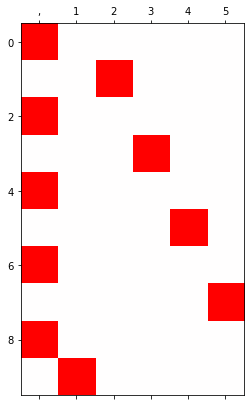

In [ ]:
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);

In [ ]:
# torch.nn.RNN()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.
rnn = torch.nn.RNN(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)

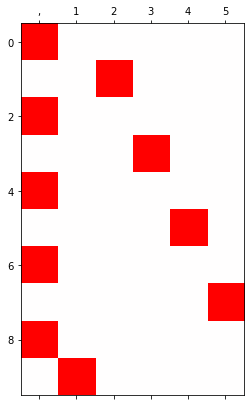

In [ ]:
for epoc in range(100):
    ## 1
    hidden, hT = rnn(x) 
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);

In [ ]:
#  torch.nn.LSTMCell()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.
torch.manual_seed(202250926) 
lstmcell = torch.nn.LSTMCell(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstmcell.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1
    hidden = []
    ht = torch.zeros(8).to("cuda:0")
    ct = torch.zeros(8).to("cuda:0")
    for xt,yt in zip(x,y): 
        ht,ct = lstmcell(xt,(ht,ct))
        hidden.append(ht) 
    hidden = torch.stack(hidden)
    output = linr(hidden)
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
yhat = soft(output)
yhat[:10].to("cpu").detach().numpy().round(3)

array([[0.997, 0.   , 0.002, 0.   , 0.001, 0.   ],
       [0.   , 0.   , 0.991, 0.004, 0.005, 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.028, 0.003, 0.969, 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.004, 0.   , 0.975, 0.021],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.019, 0.   , 0.   , 0.021, 0.961],
       [0.998, 0.002, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.937, 0.   , 0.03 , 0.   , 0.032]], dtype=float32)

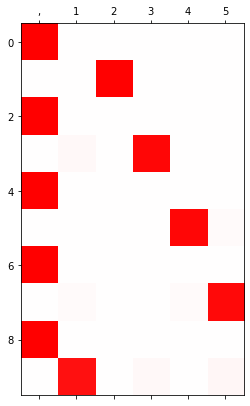

In [ ]:
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);

In [ ]:
# torch.nn.LSTM()을 이용하여 다음단어를 예측하는 신경망을 설계하고 학습하라.
lstm = torch.nn.LSTM(6,8).to("cuda:0")
linr = torch.nn.Linear(8,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

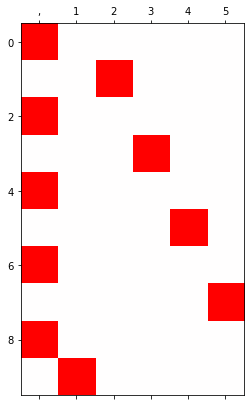

In [ ]:
for epoc in range(100):
    ## 1
    hidden, (hT,cT) = lstm(x)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','1','2','3','4','5']);